<a href="https://colab.research.google.com/github/khulaifiachmad50-tech/Tugas-Minggu-4/blob/main/Salinan_dari_Selamat_Datang_di_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

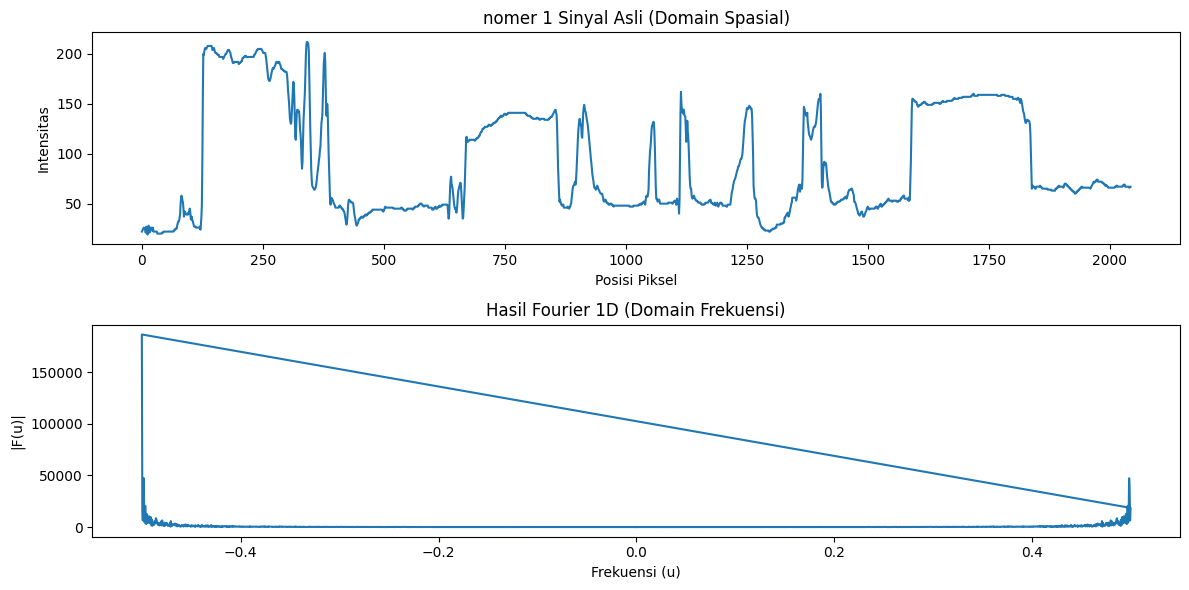

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Baca gambar grayscale
img = cv2.imread('baru.jpg', 0)

# 2. Ambil satu baris (misal baris ke-100) sebagai sinyal 1D
row = img[100, :]   # sinyal spasial 1D

# 3. Lakukan Fourier Transform 1D
F = np.fft.fft(row)
Fshift = np.fft.fftshift(F)

# 4. Hitung magnitude spectrum
magnitude = np.abs(Fshift)
freq = np.fft.fftfreq(len(row))

# 5. Tampilkan hasil
plt.figure(figsize=(12,6))


plt.subplot(2,1,1)
plt.plot(row)
plt.title('nomer 1 Sinyal Asli (Domain Spasial)')
plt.xlabel('Posisi Piksel')
plt.ylabel('Intensitas')

plt.subplot(2,1,2)
plt.plot(freq, magnitude)
plt.title('Hasil Fourier 1D (Domain Frekuensi)')
plt.xlabel('Frekuensi (u)')
plt.ylabel('|F(u)|')
plt.tight_layout()
plt.show()

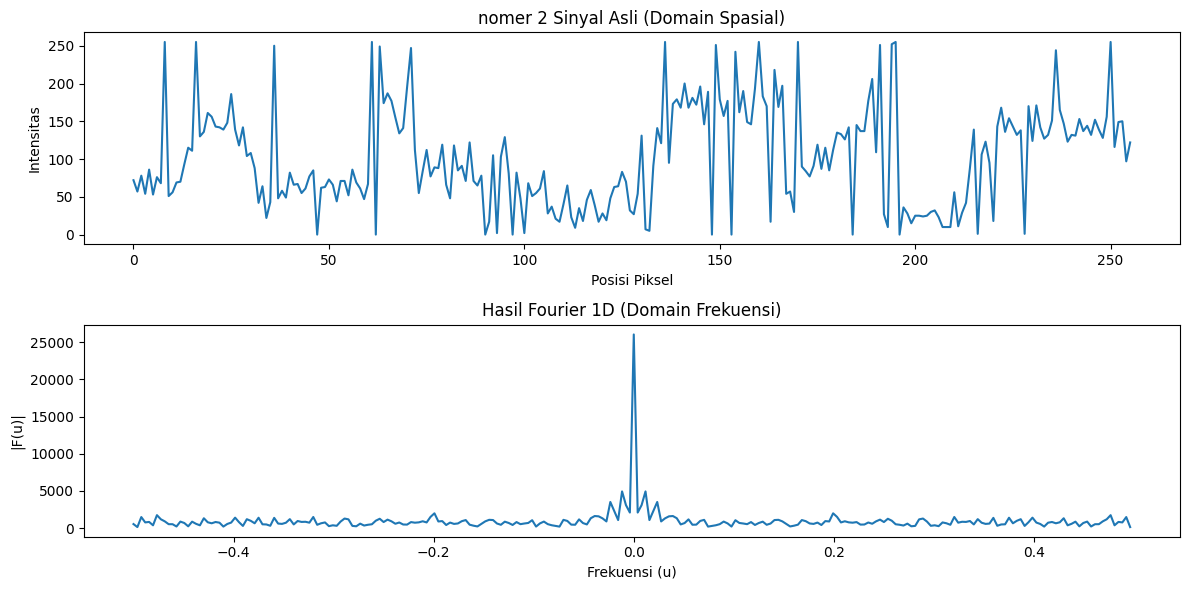

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Baca gambar dan ubah ke grayscale
img = cv2.imread('imgae_w_noise.png')          # baca gambar berwarna
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)   # ubah ke grayscale

# 2. Ambil satu baris (misal baris ke-100) sebagai sinyal 1D
row = gray[100, :]   # sinyal spasial 1D

# 3. Lakukan Fourier Transform 1D
F = np.fft.fft(row)
Fshift = np.fft.fftshift(F)

# 4. Hitung magnitude spectrum dan frekuensi
magnitude = np.abs(Fshift)
freq = np.fft.fftfreq(len(row))
freq_shift = np.fft.fftshift(freq)  # geser juga sumbu frekuensinya agar selaras dengan Fshift

# 5. Tampilkan hasil
plt.figure(figsize=(12,6))

# a. Sinyal asli (baris gambar)
plt.subplot(2,1,1)
plt.plot(row)
plt.title('nomer 2 Sinyal Asli (Domain Spasial)')
plt.xlabel('Posisi Piksel')
plt.ylabel('Intensitas')

# b. Spektrum Fourier 1D
plt.subplot(2,1,2)
plt.plot(freq_shift, magnitude)
plt.title('Hasil Fourier 1D (Domain Frekuensi)')
plt.xlabel('Frekuensi (u)')
plt.ylabel('|F(u)|')

plt.tight_layout()
plt.show()

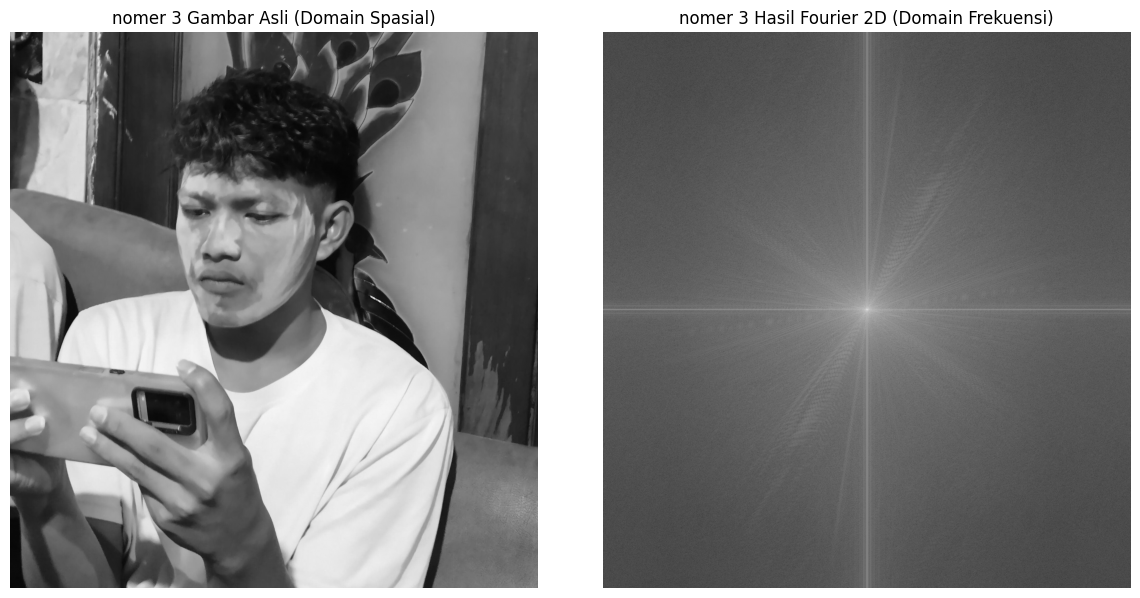

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Baca gambar dan ubah ke grayscale
img = cv2.imread('baru.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 2. Lakukan Fourier Transform 2D
F = np.fft.fft2(gray)            # Fourier Transform 2D
Fshift = np.fft.fftshift(F)      # Geser supaya frekuensi nol di tengah

# 3. Hitung magnitude spectrum (log agar tampak jelas)
magnitude_spectrum = 20 * np.log(np.abs(Fshift) + 1)  # +1 untuk hindari log(0)

# 4. Tampilkan hasil
plt.figure(figsize=(12,6))

# a. Gambar grayscale asli
plt.subplot(1,2,1)
plt.imshow(gray, cmap='gray')
plt.title('nomer 3 Gambar Asli (Domain Spasial)')
plt.axis('off')

# b. Hasil Fourier 2D (Spektrum Frekuensi)
plt.subplot(1,2,2)
plt.imshow(magnitude_spectrum, cmap='gray')
plt.title('nomer 3 Hasil Fourier 2D (Domain Frekuensi)')
plt.axis('off')

plt.tight_layout()
plt.show()

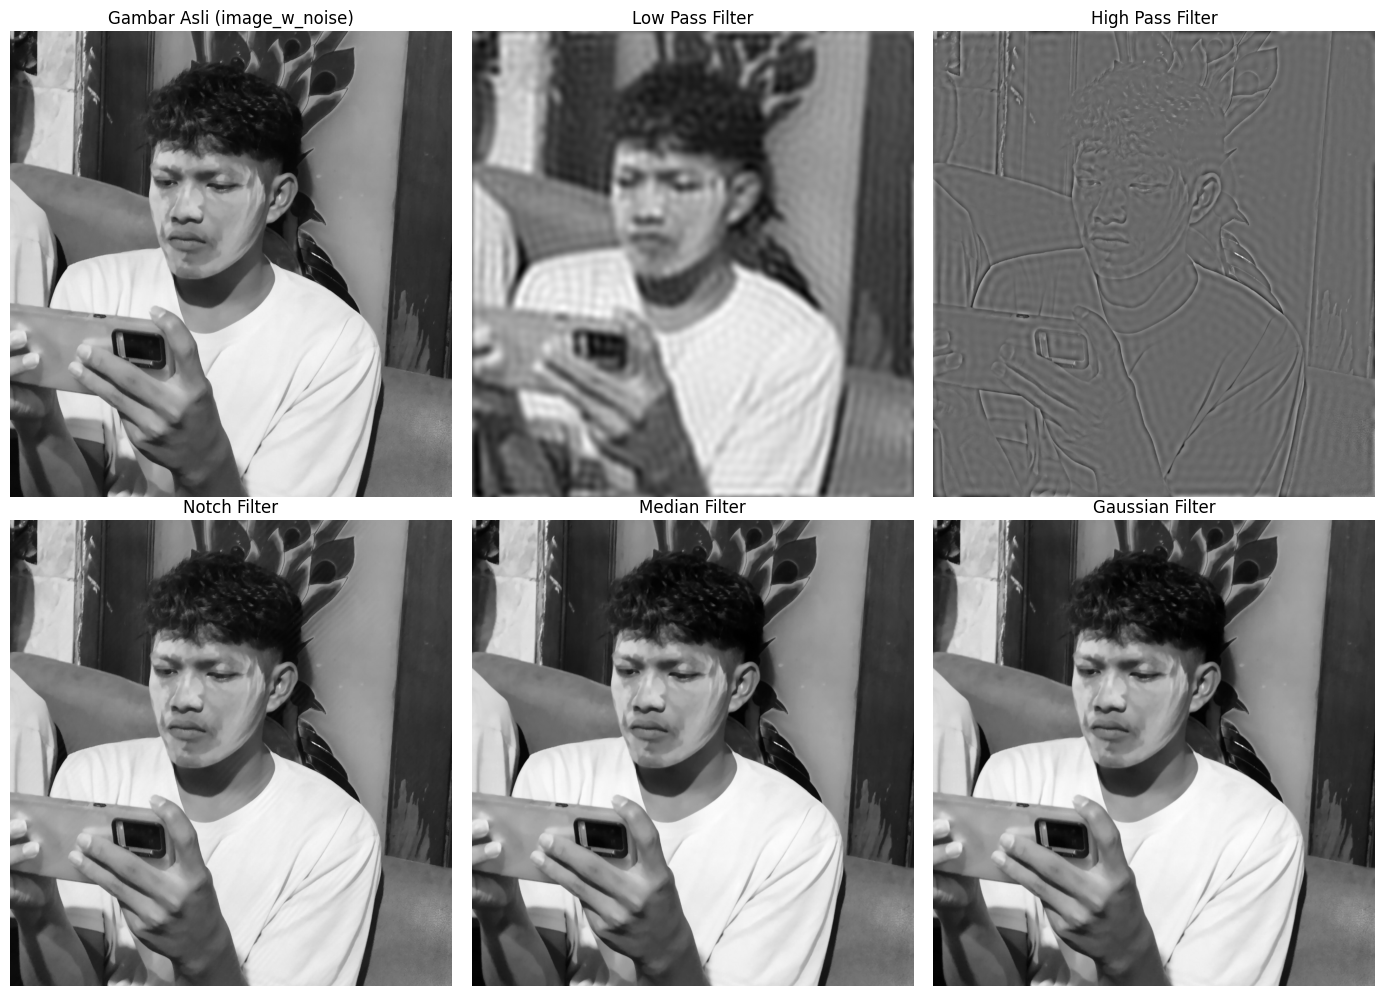

In [ ]:

import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Baca gambar grayscale
img_noise = cv2.imread('baru.jpg', 0)

# 2. Transformasi Fourier 2D
F = np.fft.fft2(img_noise)
Fshift = np.fft.fftshift(F)

# Ukuran citra dan titik tengah
rows, cols = img_noise.shape
crow, ccol = rows // 2, cols // 2

# ==============================
# a. Low Pass Filter (LPF)
# ==============================
mask_lpf = np.zeros((rows, cols), np.uint8)
r = 40  # radius cutoff
cv2.circle(mask_lpf, (ccol, crow), r, 1, thickness=-1)
F_lpf = Fshift * mask_lpf
img_lpf = np.fft.ifft2(np.fft.ifftshift(F_lpf)).real

# ==============================
# b. High Pass Filter (HPF)
# ==============================
mask_hpf = 1 - mask_lpf
F_hpf = Fshift * mask_hpf
img_hpf = np.fft.ifft2(np.fft.ifftshift(F_hpf)).real

# ==============================
# c. Notch Filter
# ==============================
mask_notch = np.ones((rows, cols), np.uint8)
# contoh hilangkan noise periodik di titik tertentu
cv2.circle(mask_notch, (ccol + 60, crow + 60), 10, 0, thickness=-1)
cv2.circle(mask_notch, (ccol - 60, crow - 60), 10, 0, thickness=-1)
F_notch = Fshift * mask_notch
img_notch = np.fft.ifft2(np.fft.ifftshift(F_notch)).real

# ==============================
# d. Median Filter (spasial)
# ==============================
img_median = cv2.medianBlur(img_noise, 5)

# ==============================
# e. Gaussian Filter (spasial)
# ==============================
img_gaussian = cv2.GaussianBlur(img_noise, (5,5), 1)

# ==============================
# Tampilkan Semua Hasil
# ==============================
plt.figure(figsize=(14,10))

plt.subplot(2,3,1)
plt.imshow(img_noise, cmap='gray')
plt.title('Gambar Asli (image_w_noise)')
plt.axis('off')

plt.subplot(2,3,2)
plt.imshow(img_lpf, cmap='gray')
plt.title('Low Pass Filter')
plt.axis('off')

plt.subplot(2,3,3)
plt.imshow(img_hpf, cmap='gray')
plt.title('High Pass Filter')
plt.axis('off')

plt.subplot(2,3,4)
plt.imshow(img_notch, cmap='gray')
plt.title('Notch Filter')
plt.axis('off')

plt.subplot(2,3,5)
plt.imshow(img_median, cmap='gray')
plt.title('Median Filter')
plt.axis('off')

plt.subplot(2,3,6)
plt.imshow(img_gaussian, cmap='gray')
plt.title('Gaussian Filter')
plt.axis('off')

plt.tight_layout()
plt.show()